<h2>Exploring data<h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [2]:
df.shape

(18249, 14)

In [3]:
df["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [4]:
df.describe

<bound method NDFrame.describe of        Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.

<h2>General trends</h2>
<blockquote>1. How is the average price over time?<br>
2. How is the average volume over time?<br>
3. Is there a correlation between price and volume?</blockquote>

In [7]:
#Add months column
df['month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [8]:
prices = df.pivot_table( values = "AveragePrice", index = "month", columns = "year")

<AxesSubplot:title={'center':'Average Avocado Price'}, xlabel='Month', ylabel='Price'>

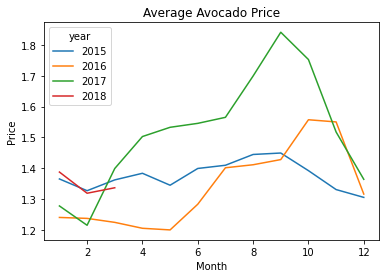

In [9]:
prices.plot(title = "Average Avocado Price", ylabel = "Price", xlabel = "Month")

<blockquote>Avocado prices tend to rise significantly between July and October each year</blockquote>

In [11]:
volume = df.pivot_table(values = "Total Volume", index = "month", columns = "year")

<AxesSubplot:title={'center':'Average Volume Sold'}, xlabel='Month', ylabel='Volume'>

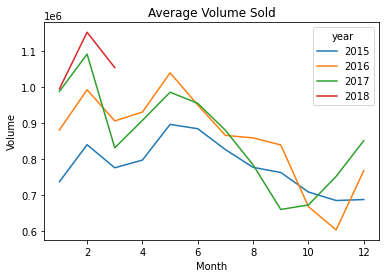

In [12]:
volume.plot(title = "Average Volume Sold", ylabel = "Volume", xlabel = "Month")

<blockquote>Avocado volumes surge in February and May before dropping gradually in June.</blockquote>

In [13]:
p2015 = prices[2015]
v2015 = volume[2015]
table2015 = pd.concat([p2015, v2015], axis = 1)
table2015.columns = ["Price", "Volume"]

p2016 = prices[2016]
v2016 = volume[2016]
table2016 = pd.concat([p2016, v2016], axis = 1)
table2016.columns = ["Price", "Volume"]

p2017 = prices[2017]
v2017 = volume[2017]
table2017 = pd.concat([p2017, v2017], axis = 1)
table2017.columns = ["Price", "Volume"]

p2018 = prices[2018]
v2018 = volume[2018]
table2018 = pd.concat([p2018, v2018], axis = 1)
table2018.columns = ["Price", "Volume"]

[Text(0.5, 0, 'Volume')]

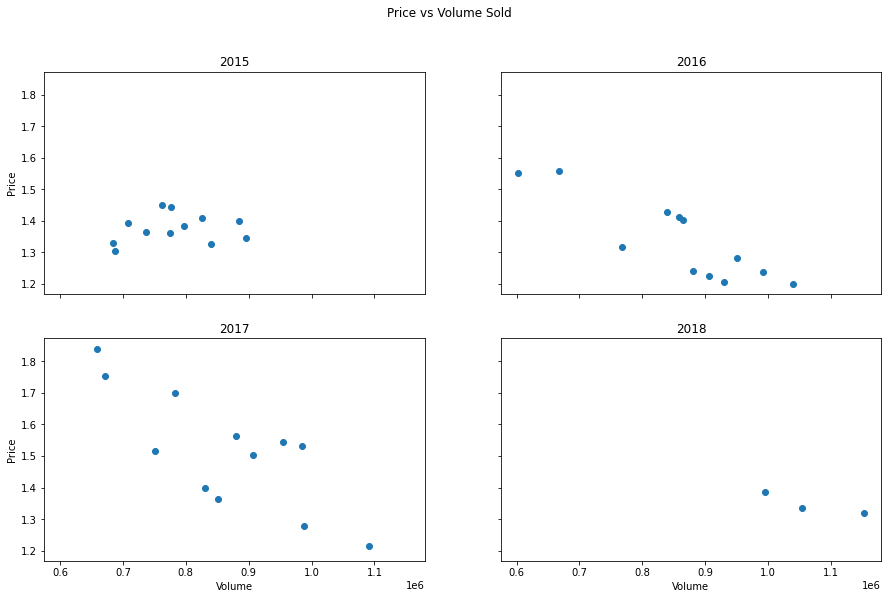

In [14]:
fig, axs = plt.subplots(2,2, sharex = True, sharey = True)
fig.suptitle("Price vs Volume Sold")
fig.set_size_inches(15, 9)

axs[0,0].scatter(table2015["Volume"],table2015["Price"])
axs[0,0].set_title('2015')
axs[0,0].set(ylabel = "Price")

axs[0,1].scatter(table2016["Volume"],table2016["Price"])
axs[0,1].set_title('2016')

axs[1,0].scatter(table2017["Volume"],table2017["Price"])
axs[1,0].set_title('2017')
axs[1,0].set(xlabel = "Volume", ylabel = "Price")

axs[1,1].scatter(table2018["Volume"],table2018["Price"])
axs[1,1].set_title('2018')
axs[1,1].set(xlabel = "Volume")

<blockquote>- Price in 2015 did not affect much on volume.<br>
- In 2016, 2017 and 2018, price and volume were negatively correlated.<br>
- The demand for avocado tends to increase throughout the year.</blockquote>

<h2>Avocado Popularity by Region</h2>
<blockquote>1. Find 5 regions which demand most and least avocados.<br>
2. Has the demand for avocados across these regions been increasing from year to year?</blockquote>

In [40]:
regions = df.pivot_table(values = "Total Volume", index = "region", aggfunc=np.sum)
regions.sort_values("Total Volume", ascending = False).head(15)

,Total Volume
region,
TotalUS,5.864740e+09
West,1.086779e+09
California,1.028982e+09
SouthCentral,1.011280e+09
Northeast,7.132809e+08
Southeast,6.152384e+08
GreatLakes,5.896425e+08
Midsouth,5.083494e+08
LosAngeles,5.078965e+08


<blockquote>The regions includes cities, states and cover several states / areas. I will focus on top and bottom 5 cities only.
  
Top 5:<br>
- Los Angeles <br>
- New York <br>
- Dallas Ft Worth <br>
- Houston <br>
- Phoenix Tucson <br>
    
Bottom 5:<br>
- Louisville<br>
- Albany <br>
- Spokane <br>
- Boise <br>
- Syracuse 
</blockquote>   

In [19]:
topcities = df[(df["region"] == "LosAngeles") | (df["region"] == "NewYork") | 
                 (df["region"] == "DallasFtWorth") | (df["region"] == "Houston") | 
                 (df["region"] == "PhoenixTucson")]

topcities

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
572,0,2015-12-27,0.80,1020390.64,494425.64,276556.76,84912.97,164495.27,136560.04,12277.70,15657.53,conventional,2015,DallasFtWorth,12
573,1,2015-12-20,0.82,928051.16,439792.68,257532.45,91158.34,139567.69,103511.91,10331.25,25724.53,conventional,2015,DallasFtWorth,12
574,2,2015-12-13,0.79,980891.18,476178.99,319789.56,62436.80,122485.83,114978.22,7472.99,34.62,conventional,2015,DallasFtWorth,12
575,3,2015-12-06,0.74,1054849.97,514160.41,412692.22,8533.47,119463.87,108772.12,10525.27,166.48,conventional,2015,DallasFtWorth,12
576,4,2015-11-29,0.80,839818.87,477944.48,244879.52,6211.50,110783.37,96799.40,13967.44,16.53,conventional,2015,DallasFtWorth,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18004,7,2018-02-04,1.62,14456.10,2260.81,2011.22,0.00,10184.07,10169.69,14.38,0.00,organic,2018,PhoenixTucson,2
18005,8,2018-01-28,1.69,13125.79,1802.37,2243.06,0.00,9080.36,9073.81,6.55,0.00,organic,2018,PhoenixTucson,1
18006,9,2018-01-21,1.78,12112.82,2178.78,1901.41,0.00,8032.63,8031.33,1.30,0.00,organic,2018,PhoenixTucson,1
18007,10,2018-01-14,1.77,13514.36,3618.90,2795.53,0.00,7099.93,7086.72,13.21,0.00,organic,2018,PhoenixTucson,1


In [22]:
bottomcities = df[(df["region"] == "Louisville") | (df["region"] == "Albany") | 
                 (df["region"] == "Spokane") | (df["region"] == "Boise") | 
                 (df["region"] == "Syracuse")]

bottomcities

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18196,7,2018-02-04,1.22,6294.16,85.22,152.09,0.00,6056.85,2847.48,3209.37,0.0,organic,2018,Syracuse,2
18197,8,2018-01-28,1.19,6393.58,30.09,128.49,0.00,6235.00,5670.94,564.06,0.0,organic,2018,Syracuse,1
18198,9,2018-01-21,1.27,3159.80,92.12,73.17,0.00,2994.51,2117.69,876.82,0.0,organic,2018,Syracuse,1
18199,10,2018-01-14,1.25,4343.09,116.19,64.16,0.00,4162.74,1986.09,2176.65,0.0,organic,2018,Syracuse,1


In [24]:
df["Date"].max()

'2018-03-25'

In [26]:
t_citiestable = topcities.pivot_table(values = "Total Volume", index = "year", columns = "region", aggfunc=np.sum)

#drop 2018 as data is only up to March 2018.
t_citiestable = t_citiestable.drop(2018, axis = 0)

t_citiestable

region,DallasFtWorth,Houston,LosAngeles,NewYork,PhoenixTucson
year,,,,,
2015,60311308.63,55387471.37,1.482207e+08,70607635.91,57176285.48
2016,63695249.88,58704786.43,1.631423e+08,71546563.14,59283687.23
2017,66240982.71,69093092.89,1.584812e+08,74850673.31,61170534.26


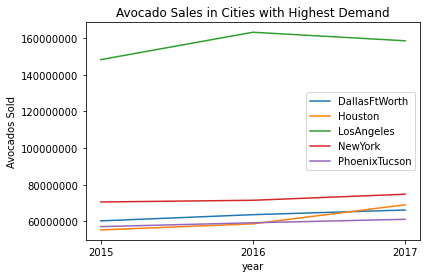

In [27]:
ax = t_citiestable.plot(xticks = t_citiestable.index)
ylab = ax.set_ylabel('Avocados Sold')
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_title('Avocado Sales in Cities with Highest Demand')
ax.legend()

In [28]:
b_citiestable = pd.pivot_table(bottomcities, values = "Total Volume", index = "year", columns = "region", aggfunc=np.sum)

#drop 2018 column as data is only up to March 2018.
b_citiestable = b_citiestable.drop(2018, axis = 0)

b_citiestable

region,Albany,Boise,Louisville,Spokane,Syracuse
year,,,,,
2015,4029896.43,3784357.34,4289003.17,4181687.17,2734333.26
2016,5264335.59,4653509.53,5076328.78,5006166.54,3429368.74
2017,5231581.78,4760561.31,5260109.44,5151528.30,3731978.02


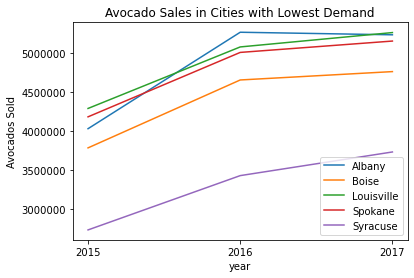

In [29]:
ax = b_citiestable.plot(xticks = b_citiestable.index)
ylab = ax.set_ylabel('Avocados Sold')
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_title('Avocado Sales in Cities with Lowest Demand')
ax.legend()

- Highest and lowest demand cities all had increases in sales between 2015 and 2016.<br>
- Price & volume sold plot also shows an increase in sales in the first 3 months of 2018. 

<h2>Sales and Popularity of different avocado types</h2>
<blockquote>1. What are demands of different avocado types over the years?<br>
2. Which avocado types are more / less popular in different regions?</blockquote>

In [39]:
avo_4046 = df.pivot_table(values = "4046", index = "region", aggfunc = np.sum)
avo_4046.sort_values("4046", ascending = False).head(15)

,4046
region,
TotalUS,2.054936e+09
SouthCentral,5.350414e+08
California,3.989670e+08
West,3.985905e+08
Southeast,3.396871e+08
LosAngeles,2.238794e+08
Plains,1.435114e+08
PhoenixTucson,1.154277e+08
DallasFtWorth,1.105565e+08



Top Cities for 4046:<br>
- LosAngeles<br>
- PhoenixTucson<br>
- DallasFtWorth<br>
- Houston<br>
- MiamiFtLauderdale<br>
    
Bottom Cities for 4046:<br>
- HartfordSpringfield<br>
- Louisville<br>
- Albany<br>
- BuffaloRochester<br>
- Syracuse<br>

In [43]:
avo_4225 = df.pivot_table(values = "4225", index = "region", aggfunc = np.sum)
avo_4225.sort_values("4225", ascending = False).head(15)

,4225
region,
TotalUS,2.015012e+09
Northeast,4.744847e+08
California,3.514914e+08
West,3.007589e+08
GreatLakes,2.672577e+08
Midsouth,2.223731e+08
SouthCentral,2.204500e+08
NewYork,1.633538e+08
LosAngeles,1.021340e+08


Top Cities for 4225:<br>
- New York<br>
- Los Angeles <br>
- Chicago<br>
- San Francisco<br>
- Baltimore Washington<br>

Bottom Cities for 4225:<br>
- New Orleans Mobile<br>
- Nashville<br>
- StLouis<br>
- Jacksonville<br>
- Boise<br>

In [45]:
avo_4770 = df.pivot_table(values = "4770", index = "region", aggfunc = np.sum)
avo_4770.sort_values("4770", ascending = False).tail(15)

,4770
region,
Pittsburgh,286965.81
Spokane,280219.09
NewOrleansMobile,208237.87
HartfordSpringfield,170253.64
MiamiFtLauderdale,105400.46
Atlanta,105248.39
HarrisburgScranton,74340.63
Jacksonville,73426.05
Albany,55037.33


Top cities for 4770:
- Chicago<br>
- Los Angeles<br>
- Detroit<br>
- Houston<br>
- DallasFtWorth<br>

Bottom cities for 4770:
- Orlando<br>
- Tampa<br>
- Syracuse<br>
- Roanoke<br>
- StLouis<br>

In [36]:
avo_types = df.pivot_table(values = ["4046", "4225", "4770", "Total Volume"], index = "year", aggfunc = np.sum )
avo_types

,4046,4225,4770,Total Volume
year,,,,
2015,1.709450e+09,1.761054e+09,1.427724e+08,4.385469e+09
2016,1.525123e+09,1.672728e+09,1.598798e+08,4.820890e+09
2017,1.652038e+09,1.544735e+09,9.121751e+07,4.934306e+09
2018,4.604997e+08,4.077587e+08,2.293259e+07,1.382738e+09


In [37]:
avo_types = avo_types.drop(2018, axis = 0)
avo_types = avo_types.drop("Total Volume", axis = 1)

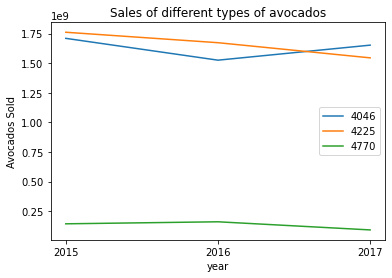

In [38]:
ax = avo_types.plot(xticks = avo_types.index)
ylab = ax.set_ylabel('Avocados Sold')
ax.set_title('Sales of different types of avocados')
ax.legend()

- 4770 decreased significantly in demand between 2016 and 2017.<br>
- All variety decreased in 2017 compared to 2015.<br>
- Total volume of avocados sold has increased throughout the year, suggesting other varieties are becoming more popular.

In [46]:
avo_types = df.pivot_table(values = ["4046", "4225", "4770", "Total Volume"], index = "year", aggfunc = np.sum )

avo_types["Other"] = avo_types["Total Volume"] - avo_types["4046"] - avo_types["4225"] - avo_types["4770"]
avo_pie = avo_types.drop("Total Volume", axis = 1)

avo_pie

,4046,4225,4770,Other
year,,,,
2015,1.709450e+09,1.761054e+09,1.427724e+08,7.721923e+08
2016,1.525123e+09,1.672728e+09,1.598798e+08,1.463159e+09
2017,1.652038e+09,1.544735e+09,9.121751e+07,1.646315e+09
2018,4.604997e+08,4.077587e+08,2.293259e+07,4.915473e+08


Text(0.5, 1.0, '2018')

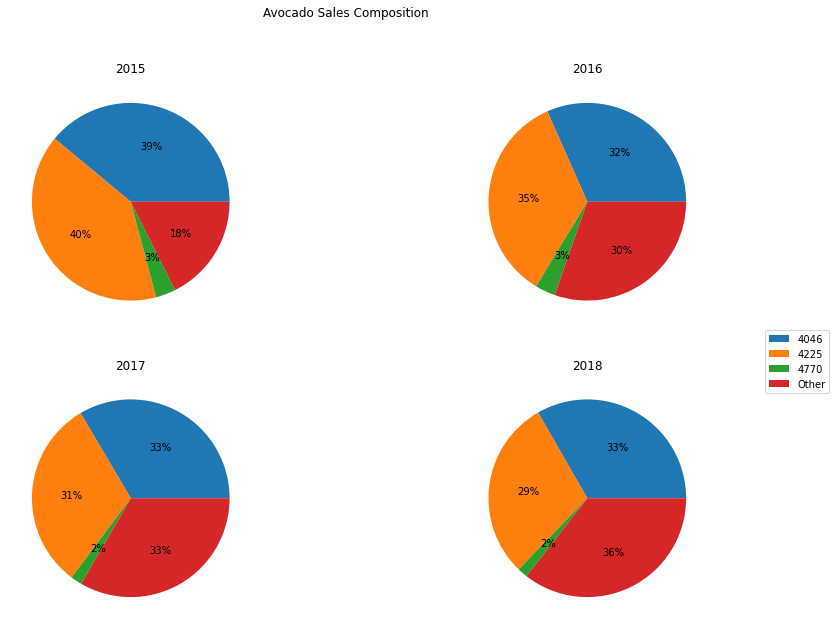

In [47]:
fig, axs = plt.subplots(2,2)
fig.suptitle("Avocado Sales Composition")
fig.set_size_inches(15,10)

axs[0,0].pie(avo_pie.iloc[0], autopct = '%.0f%%')
axs[0,0].set_title('2015')

axs[0,1].pie(avo_pie.iloc[1], autopct = '%.0f%%')
axs[0,1].set_title('2016')
axs[0,1].legend(avo_pie.columns, bbox_to_anchor=(1.5 , 0))

axs[1,0].pie(avo_pie.iloc[2], autopct = '%.0f%%')
axs[1,0].set_title('2017')

axs[1,1].pie(avo_pie.iloc[3], autopct = '%.0f%%')
axs[1,1].set_title('2018')


<h2>Sale by Bag Type</h2>

- Which bag is more popular?
- What are the trends?

In [48]:
bags = df.pivot_table(index = "year", values = ["Large Bags", "Small Bags", "XLarge Bags"], aggfunc = np.sum)
bags

,Large Bags,Small Bags,XLarge Bags
year,,,
2015,1.320664e+08,6.346827e+08,5443128.28
2016,3.366263e+08,1.106494e+09,20038284.84
2017,3.993390e+08,1.222953e+09,23997172.34
2018,1.235840e+08,3.607414e+08,7210591.87


Text(0.5, 1.0, '2018')

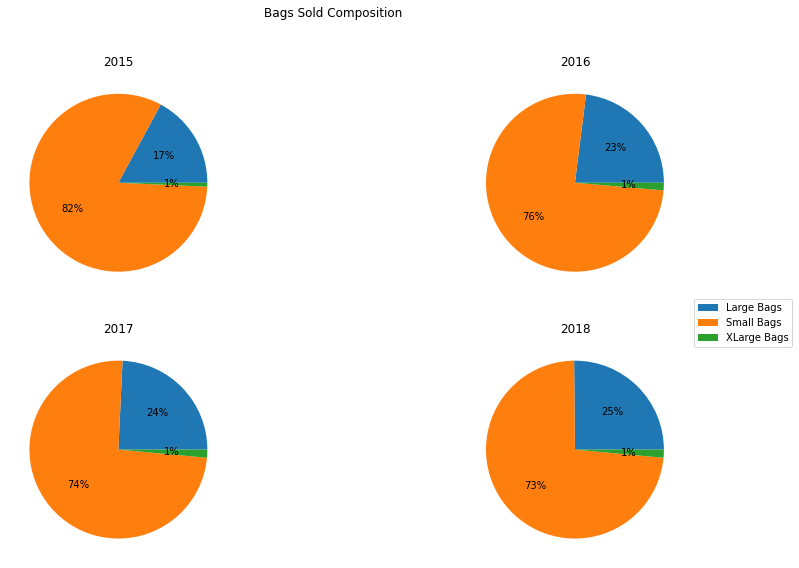

In [49]:
fig, axs = plt.subplots(2,2)
fig.suptitle("Bags Sold Composition")
fig.set_size_inches(15, 9)

axs[0,0].pie(bags.iloc[0], autopct = '%.0f%%')
axs[0,0].set_title('2015')

axs[0,1].pie(bags.iloc[1], autopct = '%.0f%%')
axs[0,1].set_title('2016')
axs[0,1].legend(bags.columns, bbox_to_anchor=(1.5 , 0))

axs[1,0].pie(bags.iloc[2], autopct = '%.0f%%')
axs[1,0].set_title('2017')

axs[1,1].pie(bags.iloc[3], autopct = '%.0f%%')
axs[1,1].set_title('2018')


Large avocado bags are increasingly being sold in place of small avocado bags. This could be because avocados are becoming more popular and people are consuming them more frequently.

In [50]:
bags = bags.drop(2018, axis = 0)

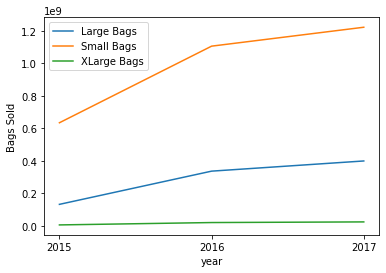

In [51]:
ax = bags.plot(xticks = bags.index)
ylab = ax.set_ylabel('Bags Sold')
ax.legend()

More of small and large bags are being sold. There was a more drastic increase in 2016 than 2017.

<h2>Conventional or Organic?<h2>


In [53]:
# Split data by year

df_2015 = df[df["year"] == 2015]
df_2016 = df[df["year"] == 2016]
df_2017 = df[df["year"] == 2017]
df_2018 = df[df["year"] == 2018]

In [54]:
years = [2015, 2016, 2017]
dfs = [df_2015, df_2016, df_2017, df_2018]
con_total = []
org_total = []

In [56]:
year = 2015
for df in dfs:
    
    c_year = df[df["type"] == "conventional"]
    o_year = df[df["type"] == "organic"]

    c_year_total = np.round(c_year["Total Volume"].sum())
    o_year_total = np.round(o_year["Total Volume"].sum())

    print(c_year_total, "bags of conventional avocados sold in", year)
    print(o_year_total, "bags of organic avocados sold in", year)

    con_total.append(c_year_total)
    org_total.append(o_year_total)
    
    year += 1

4296599236.0 bags of conventional avocados sold in 2015
88869426.0 bags of organic avocados sold in 2015
4690249813.0 bags of conventional avocados sold in 2016
130640079.0 bags of organic avocados sold in 2016
4766165793.0 bags of conventional avocados sold in 2017
168139906.0 bags of organic avocados sold in 2017
1334206069.0 bags of conventional avocados sold in 2018
48532271.0 bags of organic avocados sold in 2018


In [57]:
years.append(2018)

In [58]:
con_org_dic = {"Conventional": con_total, "Organic": org_total}
con_org = pd.DataFrame(con_org_dic, index = years)
con_org

,Conventional,Organic
2015,4.296599e+09,88869426.0
2016,4.690250e+09,130640079.0
2017,4.766166e+09,168139906.0
2018,1.334206e+09,48532271.0


Text(0.5, 1.0, '2018')

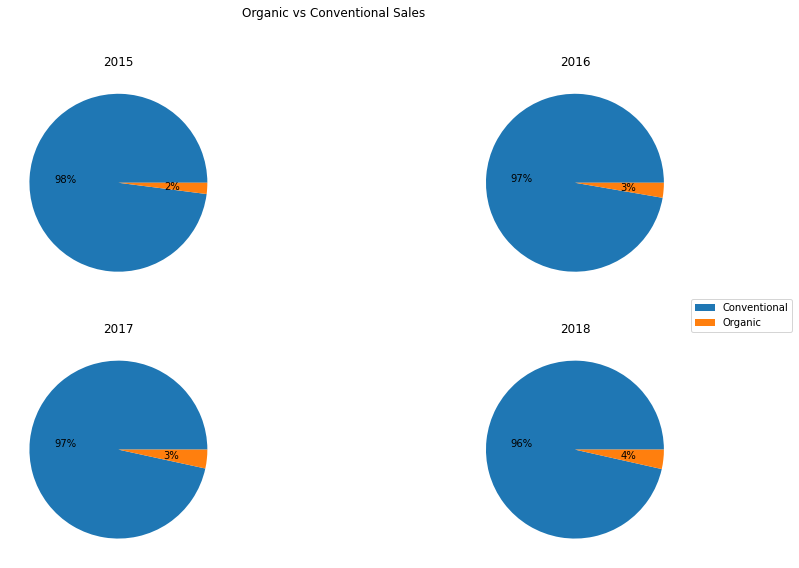

In [59]:
fig, axs = plt.subplots(2,2)
fig.suptitle("Organic vs Conventional Sales")
fig.set_size_inches(15, 9)

axs[0,0].pie(con_org.iloc[0], autopct = '%.0f%%')
axs[0,0].set_title('2015')

axs[0,1].pie(con_org.iloc[1], autopct = '%.0f%%')
axs[0,1].set_title('2016')
axs[0,1].legend(con_org.columns, bbox_to_anchor=(1.5 , 0))

axs[1,0].pie(con_org.iloc[2], autopct = '%.0f%%')
axs[1,0].set_title('2017')

axs[1,1].pie(con_org.iloc[3], autopct = '%.0f%%')
axs[1,1].set_title('2018')

- Proportion of organic avocados being sold is increasing every year.
- Suggests a shift in health awareness and perhaps wealth.

In [60]:
con_org = con_org.drop(2018, axis = 0)

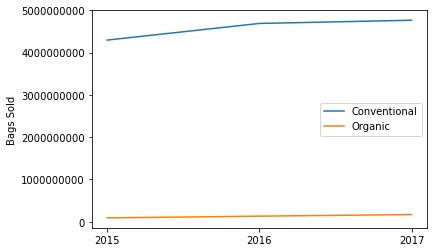

In [61]:
ax = con_org.plot(xticks = con_org.index)
ylab = ax.set_ylabel('Bags Sold')
ax.ticklabel_format(useOffset=False, style='plain')
ax.legend()

<h2>Conventional to Organic Ratio by Region<h2>

In [62]:
conventional = df[df["type"] == "conventional"]
organic = df[df["type"] == "organic"]

In [63]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
8478,0,2018-03-25,1.57,149396.50,16361.69,109045.03,65.45,23924.33,19273.80,4270.53,380.00,conventional,2018,Albany,3
8479,1,2018-03-18,1.35,105304.65,13234.86,61037.58,55.00,30977.21,26755.90,3721.31,500.00,conventional,2018,Albany,3
8480,2,2018-03-11,1.12,144648.75,15823.35,110950.68,70.00,17804.72,14480.52,3033.09,291.11,conventional,2018,Albany,3
8481,3,2018-03-04,1.08,139520.60,12002.12,105069.57,95.62,22353.29,16128.51,5941.45,283.33,conventional,2018,Albany,3
8482,4,2018-02-25,1.28,104278.89,10368.77,59723.32,48.00,34138.80,30126.31,3702.49,310.00,conventional,2018,Albany,2


In [64]:
con_ratio = pd.pivot_table(conventional, index = "region", columns = "type", values = "Total Volume", aggfunc = np.sum)
org_ratio = pd.pivot_table(organic, index = "region", columns = "type", values = "Total Volume", aggfunc = np.sum)

In [66]:
con_org_ratio = pd.concat([con_ratio, org_ratio], axis = 1)
con_org_ratio["Total"] = con_org_ratio["conventional"] + con_org_ratio["organic"]

con_org_ratio["% Organic"] = con_org_ratio["organic"] / con_org_ratio["Total"] *100

con_org_ratio.sort_values("% Organic", ascending = False).head(10)

type,conventional,organic,Total,% Organic
region,,,,
Seattle,6996900.20,944194.15,7941094.35,11.889975
Pittsburgh,1741665.96,159853.76,1901519.72,8.406632
BuffaloRochester,1959918.10,163899.94,2123818.04,7.717231
NewYork,22061729.80,1667525.37,23729255.17,7.027298
Syracuse,978729.93,68257.73,1046987.66,6.519440
HarrisburgScranton,3653972.17,247839.67,3901811.84,6.351912
Philadelphia,6161832.56,405404.36,6567236.92,6.173134
Northeast,62251475.82,4072061.02,66323536.84,6.139692
CincinnatiDayton,3395467.45,202819.84,3598287.29,5.636566


In [67]:
con_org_ratio.sort_values("% Organic", ascending = False).tail(10)

type,conventional,organic,Total,% Organic
region,,,,
Jacksonville,2655423.89,52980.45,2708404.34,1.956150
SouthCentral,89586684.42,1717025.06,91303709.48,1.880564
Houston,19612058.07,370459.04,19982517.11,1.853916
Orlando,5806509.32,108429.65,5914938.97,1.833149
DallasFtWorth,17844303.14,327442.19,18171745.33,1.801930
WestTexNewMexico,11599670.32,201150.46,11800820.78,1.704546
Sacramento,6760536.17,107213.59,6867749.76,1.561117
Tampa,6541063.61,100991.39,6642055.00,1.520484
MiamiFtLauderdale,9632938.54,108482.09,9741420.63,1.113617


In [68]:
con_org_ratio["% Organic"].describe()

count    54.000000
mean      3.972780
std       2.037109
min       1.058831
25%       2.537034
50%       3.581085
75%       5.020338
max      11.889975
Name: % Organic, dtype: float64

% Organic avocados sold can vary a bit across regions. This could be due to income, culture, and other lifestyle habits / influences.

<h2>Conclusion</h2>
<br>
- Price fluctuates a lot between 1.2 and 1.9 over 4 years.<br>
- Price is highest in September, lowest in Feb.<br>
- Volume sold is highest in Febrary and May, lowest in October.<br>
- Avocados are increasing in popularity every year across most regions.<br>
- Highest and lowest demand for various types of avocado vary across cities but are generally consistent.<br>
- Other types of avocado besides 4046, 4225, 4770, are becoming more popular.<br>
- Big bags are becoming more popular every year, however small bags still dominate at 70%+.<br>
- Organic varieties are increasing in popularity, increasing from 2% - 4% over 4 years.<br>
- % organic avocados sold by region ranges from 0.68% to 6.74%.